<a href="https://colab.research.google.com/github/Ramya-sree-25/ShadowFox/blob/main/ShadowFox_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from wordcloud import WordCloud
import re

In [ ]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Load the dataset
file_path = 'X data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# Check for missing values
print(df.isnull().sum())


clean_text    4
category      7
dtype: int64


In [ ]:
# Data Cleaning: Dropping rows with missing values in important columns (e.g., text or date columns)
df.dropna(subset=['clean_text'], inplace=True)  # Replace 'text_column_name' with the actual name of the tweet/text column


In [ ]:
# Preprocessing Text: Lowercasing, removing special characters, and links
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    return text

df['cleaned_text'] = df['clean_text'].apply(clean_text)

In [ ]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Function to get sentiment scores
def get_sentiment_vader(text):
    score = sid.polarity_scores(text)
    return score

In [ ]:
# Apply sentiment analysis
df['sentiment_scores'] = df['cleaned_text'].apply(get_sentiment_vader)

In [ ]:
# Extract compound score and categorize as positive, negative, or neutral
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment_category'] = df['compound'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))


In [ ]:
# Display sentiment distribution
print(df['sentiment_category'].value_counts())

sentiment_category
positive    76488
negative    50985
neutral     35503
Name: count, dtype: int64


<ipython-input-48-91db83b16726>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='coolwarm')


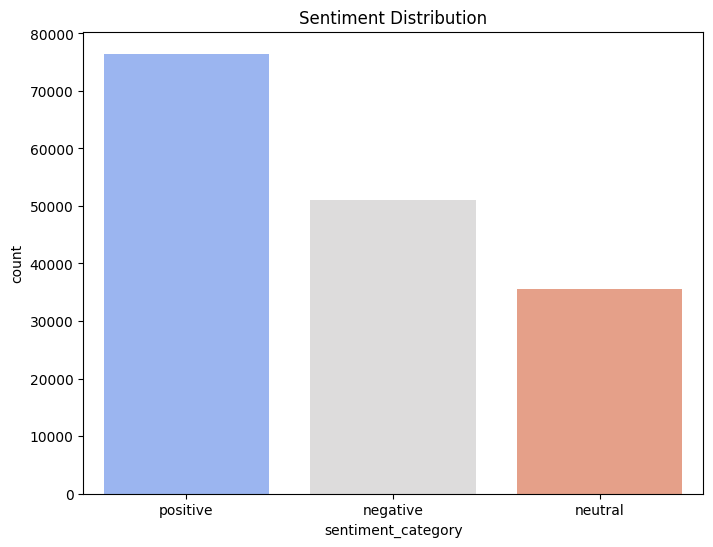

In [ ]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()


<Figure size 1000x600 with 0 Axes>

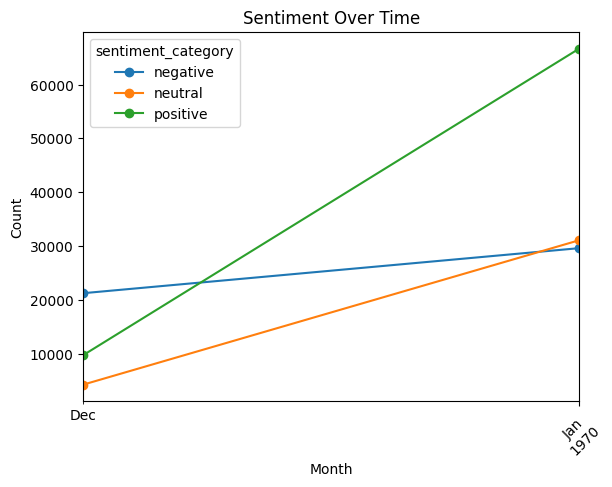

In [ ]:
# Sentiment analysis over time (assuming a 'date_column_name' exists)
df['date_column_name'] = pd.to_datetime(df['category'])  # Replace with actual date column name
df['Month'] = df['date_column_name'].dt.to_period('M')

# Group sentiment by time
sentiment_over_time = df.groupby(['Month', 'sentiment_category']).size().unstack()

# Plot sentiment over time
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(kind='line', marker='o')
plt.title('Sentiment Over Time')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter the tweets with negative sentiment
negative_tweets = df[df['sentiment_category'] == 'negative']['cleaned_text'].values

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Generate the Word Cloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)


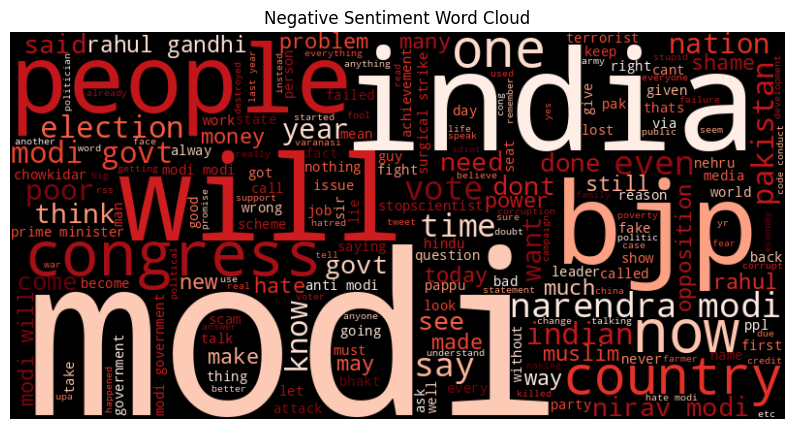

In [ ]:
# Display the word cloud for negative sentiment
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()


In [ ]:
# Analyzing specific keywords/topics (e.g., "climate change")
keyword = 'climate change'
df['contains_keyword'] = df['cleaned_text'].apply(lambda x: 1 if keyword in x else 0)
keyword_sentiment = df[df['contains_keyword'] == 1]['sentiment_category'].value_counts()


<ipython-input-52-a685e8e0720a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_sentiment.index, y=keyword_sentiment.values, palette='coolwarm')


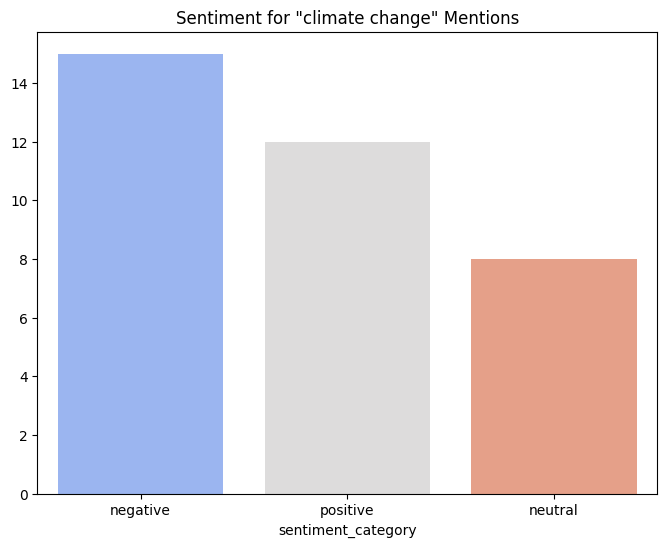

In [ ]:
# Visualize keyword-specific sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=keyword_sentiment.index, y=keyword_sentiment.values, palette='coolwarm')
plt.title(f'Sentiment for "{keyword}" Mentions')
plt.show()

# Conclusion: Deriving insights from the analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [ ]:
# Load the dataset (replace with actual file path)
file_path = 'delhiaqi.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [ ]:
# Check for missing values
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [ ]:
# Data Cleaning: Drop rows with missing values if significant, or fill them with appropriate values
df.dropna(inplace=True)


In [ ]:
# Convert 'date' column to datetime format if necessary (replace 'date_column' with actual name)
df['date_column'] = pd.to_datetime(df['date'])  # Use actual column name for date

# Extract additional time features: month and year for seasonal analysis
df['Month'] = df['date_column'].dt.month
df['Year'] = df['date_column'].dt.year
df['Day'] = df['date_column'].dt.day
# Check the summary statistics of the AQI and key pollutants
print(df.describe())

                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   

             pm2_5         pm10         nh3          date_column  Month  \
count   561.000000   561.000000  561.000000                  561  561.0   
mean    358.256364   420.988414   26.425062  2023-01-12 16:00:00    1.0   
min      60.100000    69.080000    0.630000  2023-01-01 00:00:00    1.0   
25%     204.450000   240.900000    8.230000  2023-01-06 20:0

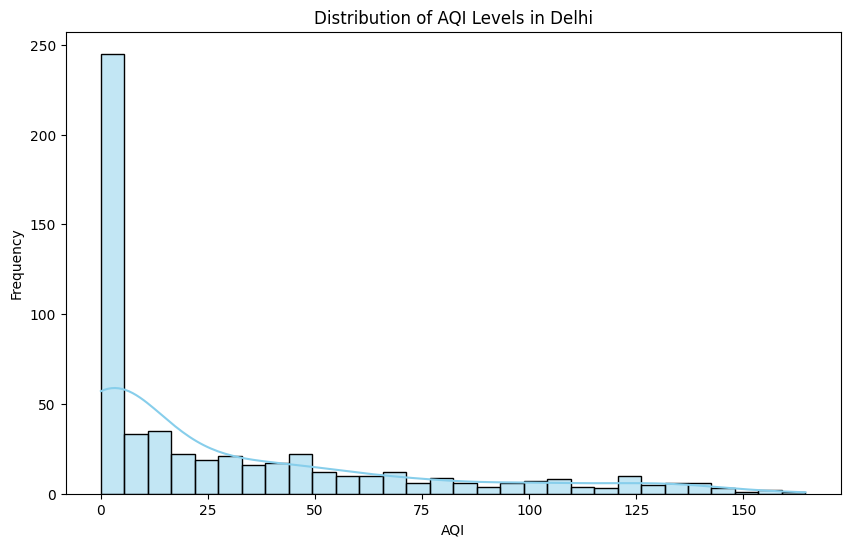

In [ ]:
# Analyze AQI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['o3'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of AQI Levels in Delhi')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


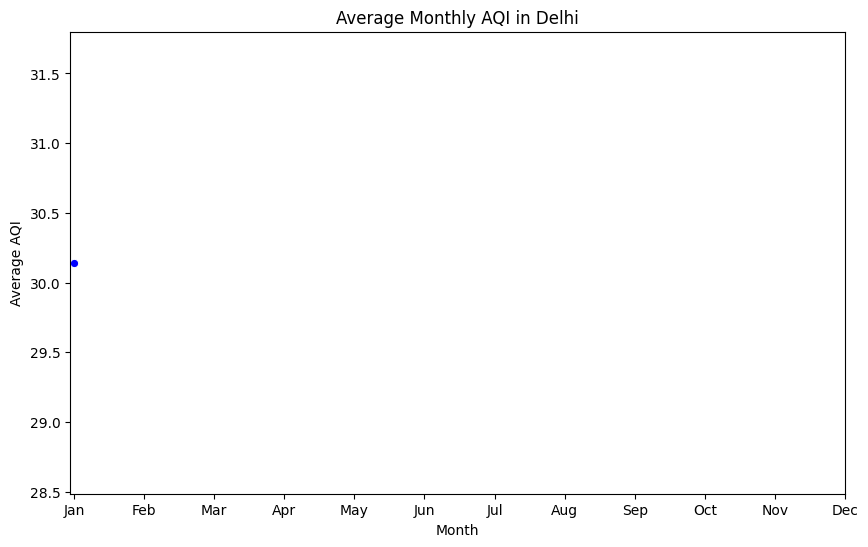

In [ ]:
# Seasonal Variations in AQI
# Group by month to find average AQI per month
monthly_aqi = df.groupby('Month')['o3'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_aqi.index, y=monthly_aqi.values, marker='o', color='blue')
plt.title('Average Monthly AQI in Delhi')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
